In [2]:
import pandas as pd
%matplotlib inline
from pathlib import Path
csvpath = Path('../Resources/high_frequency_euro_ETF_bid_ask_spreads.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='timestamp')
df.head()

,bid_ask_spread
timestamp,
2018-12-24 12:32:50.595622+00:00,0.00
2018-12-24 13:00:02.757045+00:00,108.89
2018-12-24 13:00:02.757115+00:00,-0.22
2018-12-24 13:00:13.828698+00:00,-0.21
2018-12-24 13:00:19.347938+00:00,-0.20


In [8]:
df.resample("10S")

DatetimeIndexResampler [freq=<10 * Seconds>, axis=0, closed=left, label=left, convention=start, base=0]

In [43]:
# Resample to 10 Seconds ('10S'), take the mean, and drop the NaN values
df = df.resample('10S').mean().dropna()
df.shape

(377, 1)

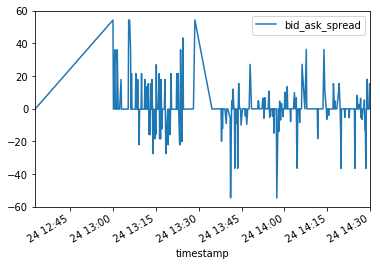

In [10]:
# Plot the resulting bid-ask spread data
df.plot()

In [13]:
# Calculate the autocorrelation
df.bid_ask_spread.autocorr(lag=1)

0.13633199304665172

In [44]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

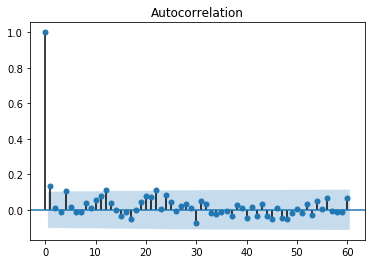

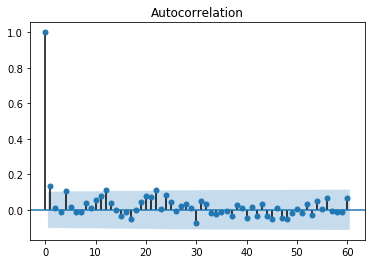

In [45]:
# Plot the ACF
plot_acf(df.bid_ask_spread, lags=60)        

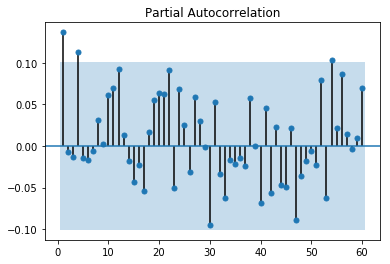

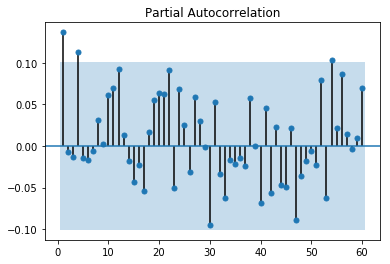

In [47]:
# Plot the PACF
sm.graphics.tsaplots.plot_pacf(df.bid_ask_spread, lags=60, zero=False)